In [28]:
# Load the basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [29]:
# read csv file
df = pd.read_csv('Bank-data.csv')
df.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,no
1,1,0.767,0,0,1,274,yes
2,2,4.858,0,1,0,167,no
3,3,4.120,0,0,0,686,yes
4,4,4.856,0,1,0,159,no


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          518 non-null    int64  
 1   interest_rate  518 non-null    float64
 2   credit         518 non-null    int64  
 3   Gender         518 non-null    int64  
 4   previous       518 non-null    int64  
 5   duration       518 non-null    int64  
 6   Churn          518 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 28.5+ KB


In [31]:
df.isna().sum()

Index            0
interest_rate    0
credit           0
Gender           0
previous         0
duration         0
Churn            0
dtype: int64

In [32]:
df.Churn = df.Churn.astype('category')
df.Churn = df.Churn.cat.codes
df.head()

,Index,interest_rate,credit,Gender,previous,duration,Churn
0,0,1.334,0,1,0,117,0
1,1,0.767,0,0,1,274,1
2,2,4.858,0,1,0,167,0
3,3,4.120,0,0,0,686,1
4,4,4.856,0,1,0,159,0


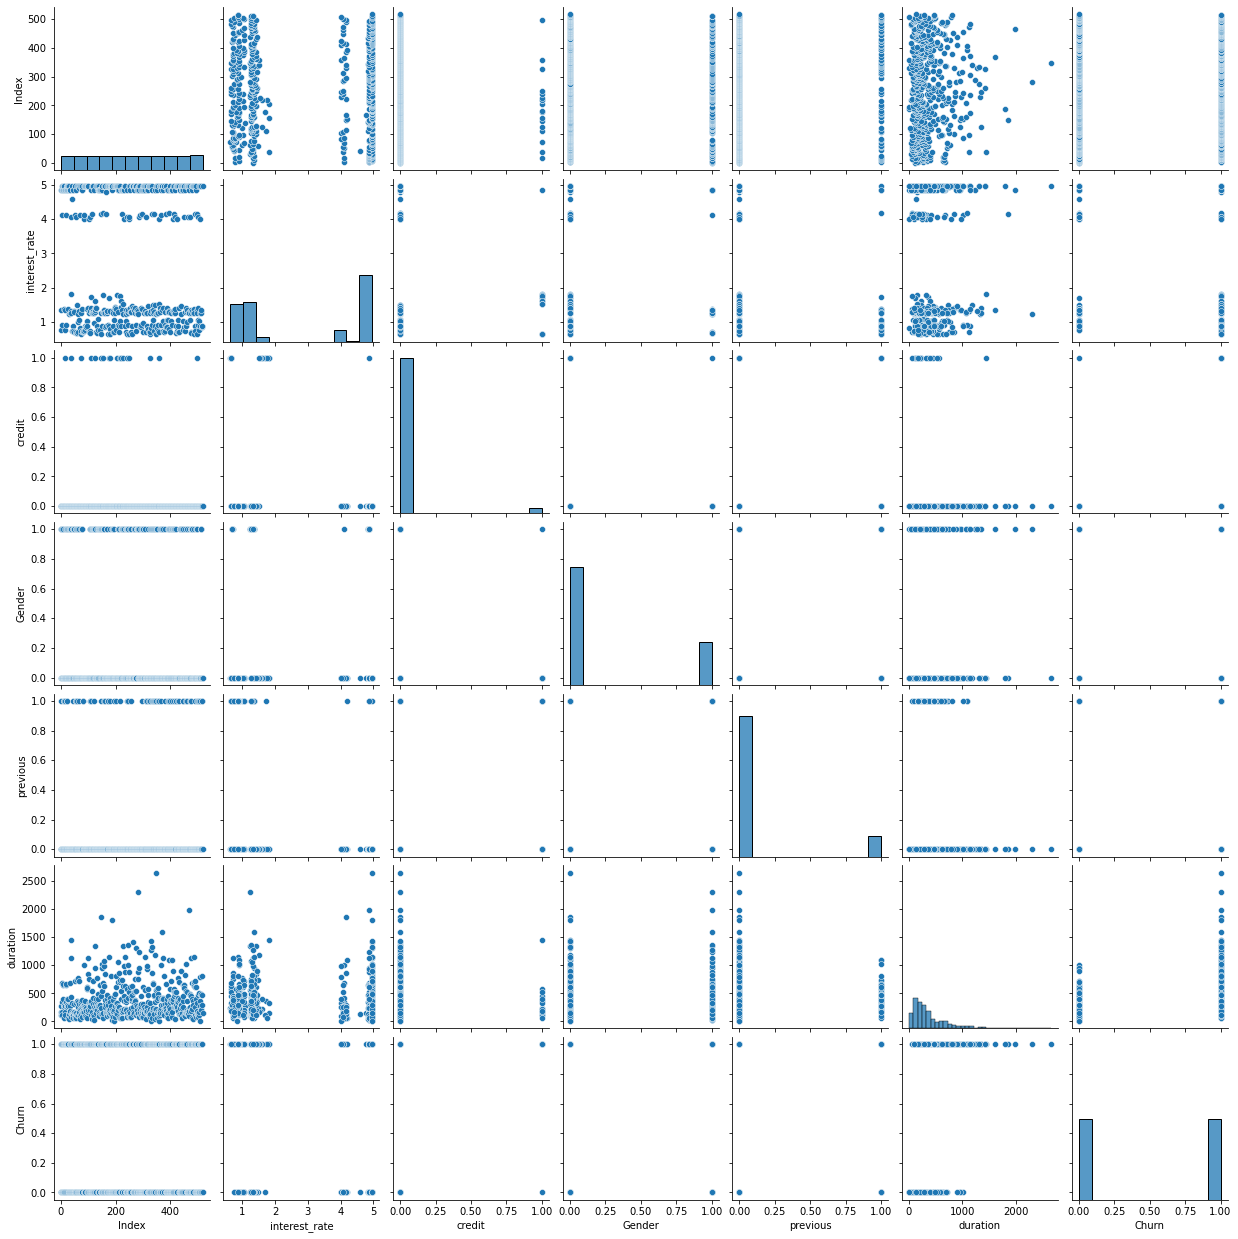

In [33]:
sns.pairplot(df);

<AxesSubplot:>

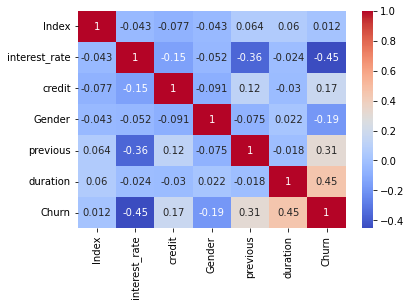

In [34]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

### In this dataset outliers and insignificant data is available and I'm keeping intetionaly to treat using PCA technique

In [35]:
# Split the data into train nad test dataset
x= df.drop(['Churn'],axis=1)
y= df.iloc[:,-1]
x.head()

,Index,interest_rate,credit,Gender,previous,duration
0,0,1.334,0,1,0,117
1,1,0.767,0,0,1,274
2,2,4.858,0,1,0,167
3,3,4.120,0,0,0,686
4,4,4.856,0,1,0,159


In [36]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=101)
print(xtrain.shape, ytrain.shape)

(414, 6) (414,)


## Simple logistic model

In [37]:
from sklearn.linear_model import LogisticRegressionCV
logit = LogisticRegressionCV(cv=10)

# model training
logit = logit.fit(xtrain,ytrain)

# model prediction
logit_pred = logit.predict(xtest)

In [38]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

# for evaluation of model
print('Classification report \n',classification_report(ytest,logit_pred))

print('confusion matrix\n',confusion_matrix(ytest,logit_pred))

print('accuracy_score',accuracy_score(ytest,logit_pred))

Classification report 
               precision    recall  f1-score   support

           0       0.90      0.88      0.89        59
           1       0.85      0.87      0.86        45

    accuracy                           0.88       104
   macro avg       0.87      0.87      0.87       104
weighted avg       0.88      0.88      0.88       104

confusion matrix
 [[52  7]
 [ 6 39]]
accuracy_score 0.875


## PCA model inorder to takeout significant values

In [39]:
from sklearn.decomposition import PCA
pc = PCA(n_components=None)
pca_xtrain = pc.fit_transform(xtrain)
pca_xtest = pc.fit_transform(xtest)

In [40]:
pd.DataFrame(pca_xtrain)
# PCA works for value ont varible
# so we cannot determine which varaible is this

,0,1,2,3,4,5
0,-294.835257,-113.378606,2.114530,-0.371513,0.645302,-0.076565
1,219.732069,172.265660,1.913736,-0.225068,-0.276208,-0.099893
2,-41.349478,-167.885036,2.013417,-0.239475,-0.345053,-0.054981
3,1407.574363,128.623392,-2.020259,-0.292144,0.007090,-0.021039
4,-110.936502,229.567085,-1.822691,0.620823,1.129124,-0.019383
...,...,...,...,...,...,...
409,-37.421068,146.550765,1.270521,-0.414572,0.754939,0.899870
410,595.604415,-33.280251,-2.131224,-0.270609,-0.023947,-0.006450
411,-177.521766,-142.525433,1.949316,-0.232048,-0.338075,-0.059565
412,-268.677454,171.956196,1.678877,0.782549,-0.118881,-0.054778


In [41]:
pc.explained_variance_ratio_

# these variance gives the information that which variable giving how much information
# 1st variable giving 76%
# 2nd variable giving 23%
# and remaining is <1%

array([7.65702635e-01, 2.34261423e-01, 3.32383998e-05, 1.82708272e-06,
       7.37117175e-07, 1.39028678e-07])

In [43]:
# Its time to improove model
from sklearn.decomposition import PCA
pca= PCA(n_components=2)

# fit and transform the data
pca_trian = pca.fit_transform(xtrain)
pca_test = pca.fit_transform(xtest)


In [45]:
pca.explained_variance_ratio_

array([0.76570264, 0.23426142])

In [57]:
# rebiuld the logistic model using pca_train and pca_test
logit_pca = LogisticRegressionCV(cv=20)
logit_pca.fit(pca_trian,ytrain)

logit_pca_train_pred = logit_pca.predict(pca_trian)
logit_pca_test_pred = logit_pca.predict(pca_test)

In [58]:
# evalution matrix
print('classification_report',classification_report(ytest,logit_pca_test_pred))
print(confusion_matrix(ytest,logit_pca_test_pred))
print("accuracy_score test: ",accuracy_score(ytest,logit_pca_test_pred))

print("accuracy_score: ", accuracy_score(ytrain,logit_pca_train_pred))


classification_report               precision    recall  f1-score   support

           0       0.80      0.73      0.76        59
           1       0.68      0.76      0.72        45

    accuracy                           0.74       104
   macro avg       0.74      0.74      0.74       104
weighted avg       0.75      0.74      0.74       104

[[43 16]
 [11 34]]
accuracy_score test:  0.7403846153846154
accuracy_score:  0.6763285024154589


In [65]:
from sklearn.model_selection import cross_val_score
cv = cross_val_score(logit_pca,pca_trian,ytrain ,cv=20)
cv[15]

0.9

## Naive Bays Model

In [90]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(pca_trian,ytrain)

# prediction
nb_pca_pred = nb.predict(pca_test)
print(accuracy_score(ytest,nb_pca_pred))

# use k fold method to improove 
cv_nb = cross_val_score(nb,pca_test,ytest,cv=12)
cv_nb

0.7211538461538461


array([0.66666667, 0.66666667, 0.66666667, 0.77777778, 0.77777778,
       0.66666667, 0.55555556, 0.55555556, 0.75      , 0.875     ,
       1.        , 0.625     ])

In [91]:
from sklearn.naive_bayes import GaussianNB
nb1 = GaussianNB()
nb1.fit(xtrain,ytrain)

# prediction
nb_pca_pred1 = nb1.predict(xtest)
print(accuracy_score(ytest,nb_pca_pred1))

# k-fold
cv_nb1 = cross_val_score(nb1,xtest,ytest,cv=10)
cv_nb1

0.7692307692307693


array([0.63636364, 0.81818182, 0.63636364, 0.54545455, 0.9       ,
       0.7       , 0.8       , 0.8       , 0.7       , 0.8       ])